# **TASK 1 PREDICTION OF STUDENTS SCORE USING SUPERVISED ML**

---



### **AUTHOR: NISHAN DUTTA**

Tha task is to predict the percentage of an student based on the no. of study hours.

**Important Libraries and dependencies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

%matplotlib inline



import warnings
warnings.filterwarnings("ignore")

**Reading Dataset**

In [ ]:
df = pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Information of data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.shape

(25, 2)

In [ ]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Finding Missing Value**

In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# **Data Analysis**

**Visualising distribution of scores.**

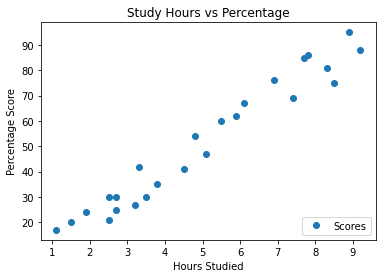

In [ ]:
df.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.legend(loc=4)
plt.title('Study Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

The "scatter plot" indicates positive linear relationship which means as much as as hours of study increases the chance of obtaing higher scores increases as well.

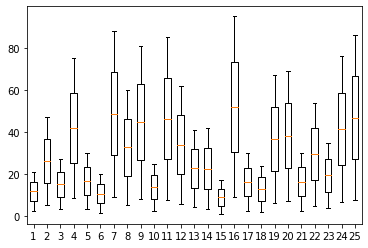

In [ ]:
plt.boxplot(df)
plt.show()

In [ ]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

In [ ]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

### **Preparing Data and splitting into train and test sets.**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size=0.2)

In [ ]:
## We have Splitted Our Data Using 80:20 Rule
print("X train.shape =", X_train.shape)
print("Y train.shape =", Y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", Y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


### **Training the Model.**

In [ ]:
linreg=LinearRegression()

In [ ]:

#Fitting Training Data
linreg.fit(X_train,Y_train)
print("Training our algorithm is finished")

Training our algorithm is finished


BO is the intercept and B1 is the slope of the line

In [ ]:
print("B0 =",linreg.intercept_,"\nB1 =",linreg.coef_)

B0 = 2.018160041434662 
B1 = [9.91065648]


Plotting the regression line

In [ ]:
Y0 = linreg.intercept_ + linreg.coef_*X_train

Plotting the train data

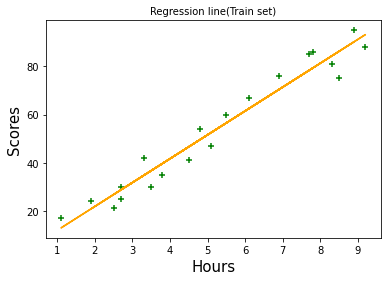

In [ ]:
plt.scatter(X_train,Y_train,color='green',marker='+')
plt.plot(X_train,Y0,color='orange')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=10)
plt.show()

# **Test Data**

Predicting the score for test data

In [ ]:
Y_pred=linreg.predict(X_test)
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [ ]:
Y_test #print Y_test

array([20, 27, 69, 30, 62])

Plotting line on test data.

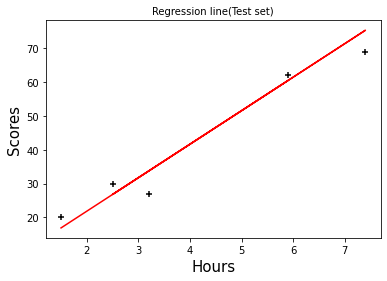

In [ ]:
plt.plot(X_test,Y_pred,color='red')
plt.scatter(X_test,Y_test,color='black',marker='+')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=10)
plt.show()

## **Comparison between Actual and Predicted Score**

In [ ]:
Y_test1 = list(Y_test)
prediction=list(Y_pred)
df_compare = pd.DataFrame({ 'Actual':Y_test1,'Result':prediction})
df_compare

,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## **Accuracy of the model**

In [ ]:
#Goodness of fit test
r2_score(Y_test,Y_pred)

0.9454906892105354

**The result showing more than 94% indicates the model to be a "Good Model"**

## **Predicting the error**

In [ ]:
MSE = metrics.mean_squared_error(Y_test,Y_pred)
root_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  21.598769307217456
Root Mean Squared Error =  4.647447612100373
Mean Absolute Error     =  4.647447612100373


## **Predicting Score**

In [ ]:
Prediction_score = linreg.predict([[9.25]])
print("Predicted score for a student studying 9.25 hours :",Prediction_score)

Predicted score for a student studying 9.25 hours : [93.69173249]


## **Conclusion**

**It can be concluded that a student studying for 9.25 hours a day is expected to score 93.69%**